In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
import cv2
import random
import numpy as np
%matplotlib inline
SEED = 69

In [2]:
train_df = pd.read_csv('../data/train.csv')

In [3]:
train_df.head()

,id,label
0,f1.png,10
1,f2.png,13
2,f3.png,7
3,f4.png,7
4,f5.png,7


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 2 columns):
id       10600 non-null object
label    10600 non-null int64
dtypes: int64(1), object(1)
memory usage: 165.7+ KB


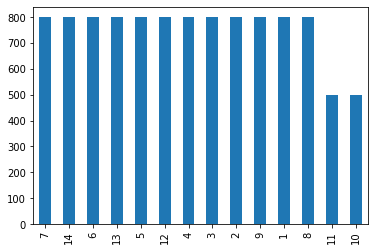

In [5]:
train_df["label"].value_counts().plot(kind='bar')

In [6]:
train_df["label"].value_counts()

7     800
14    800
6     800
13    800
5     800
12    800
4     800
3     800
2     800
9     800
1     800
8     800
11    500
10    500
Name: label, dtype: int64

59940

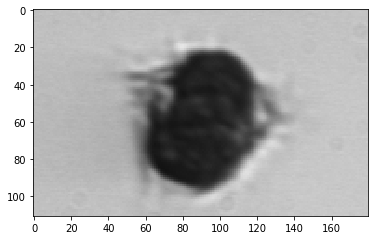

In [8]:
i = 0
image_id = train_df.iloc[i]['id']
path = '../data/train_final/' + image_id
img = cv2.imread(path)
# img = Image.open(path)
plt.imshow(img)
img.size

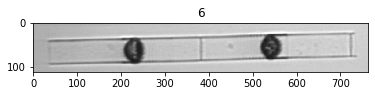

In [58]:
# plot some random training images with their ground truth labels
i = random.choice(range(train_df.shape[0]))
img = cv2.imread('../data/train_final/' + train_df.iloc[i]['id'])
plt.imshow(img)
plt.title(train_df.iloc[i]['label'])
plt.show()

### See some images

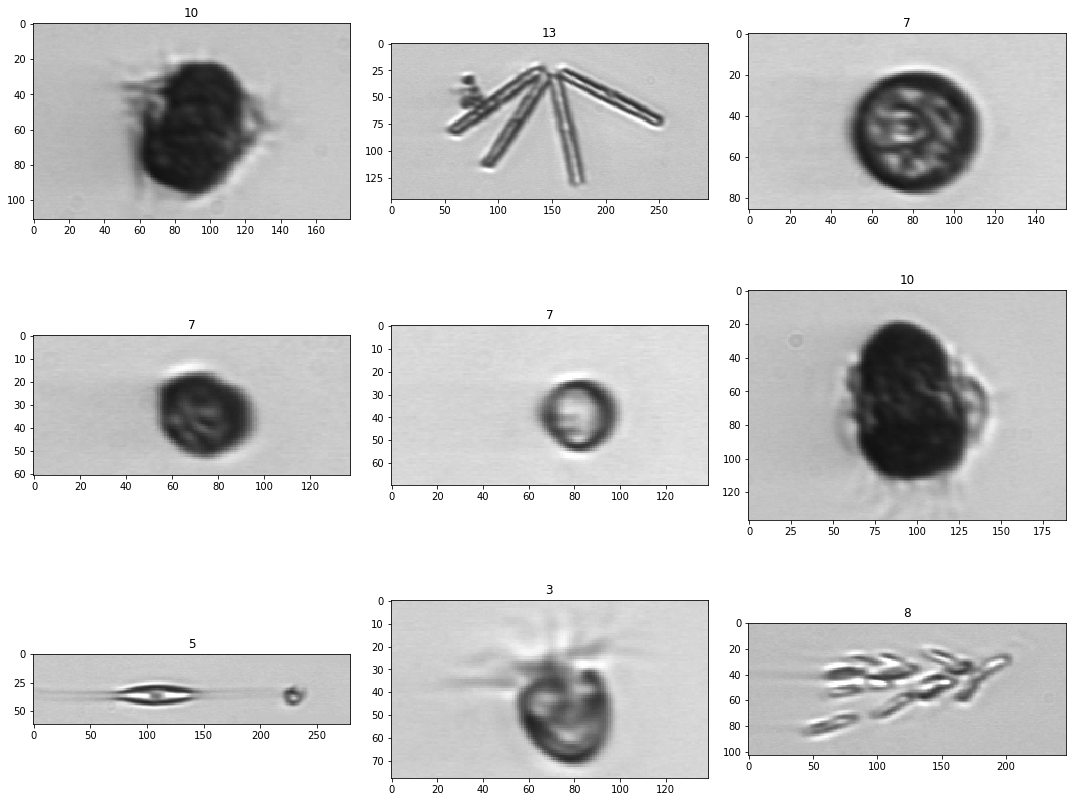

In [9]:
def display_samples(df, columns=3, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id']
        image_id = df.loc[i,'label']
        img = cv2.imread(f'../data/train_final/{image_path}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

In [11]:
train_df.head()

,id,label
0,f1.png,10
1,f2.png,13
2,f3.png,7
3,f4.png,7
4,f5.png,7


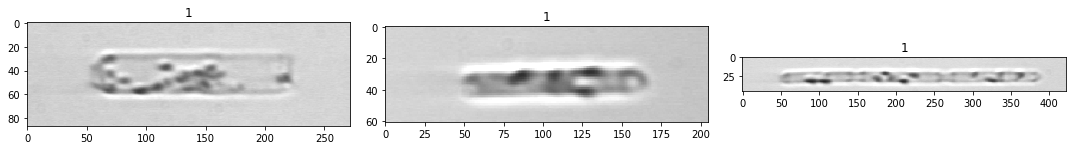

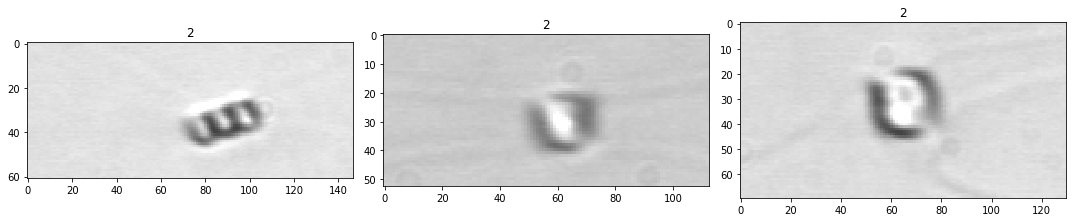

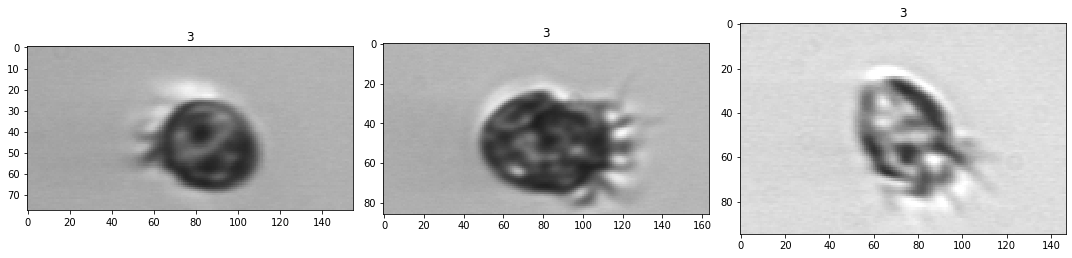

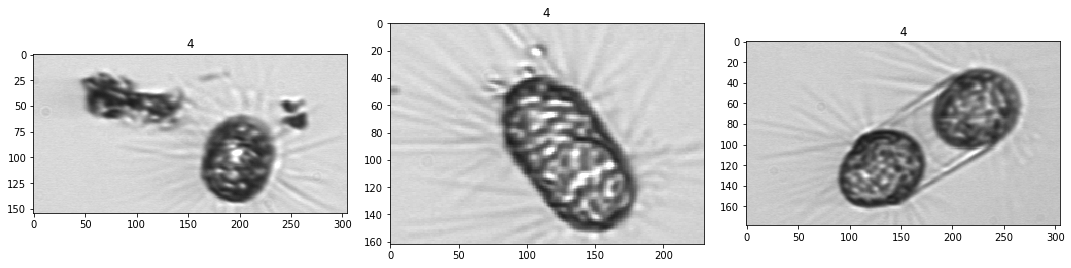

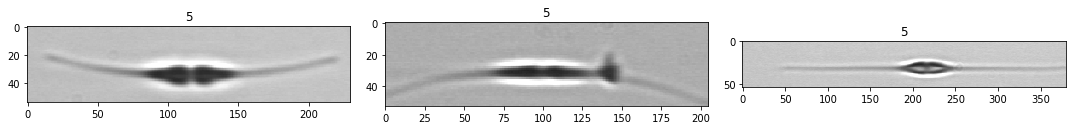

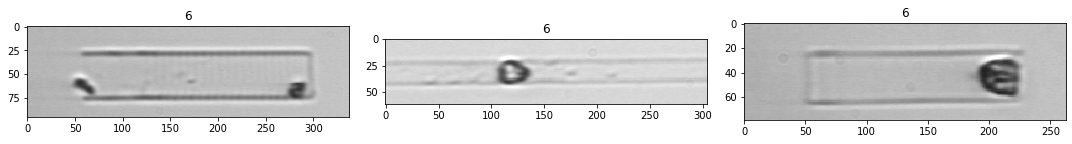

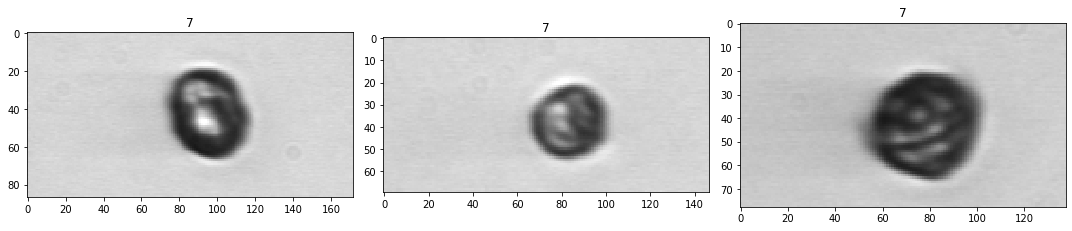

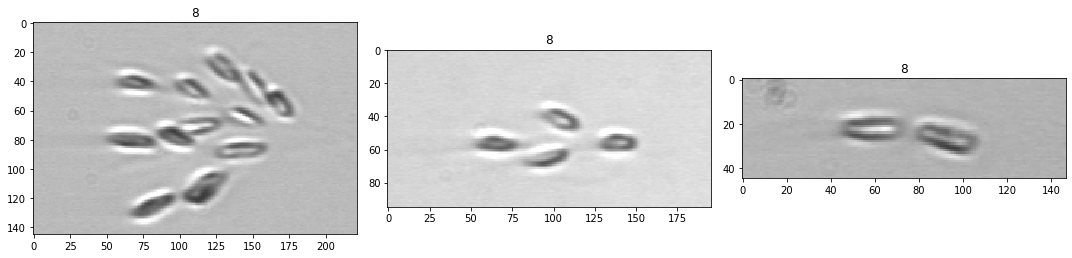

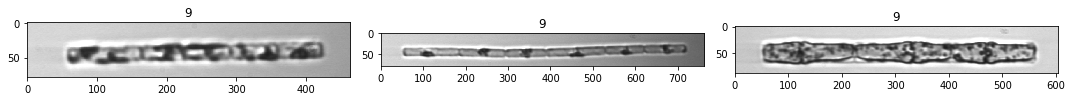

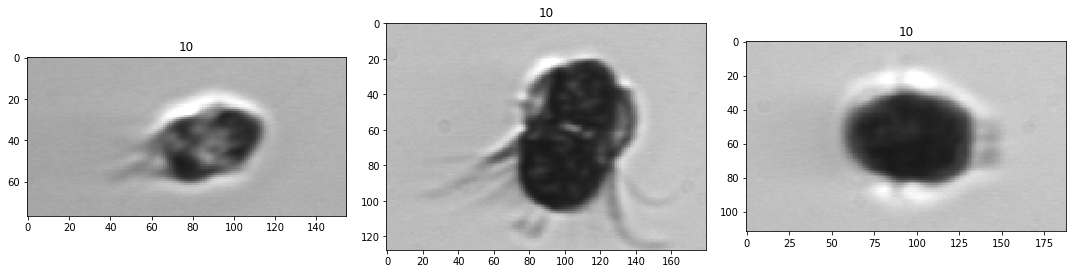

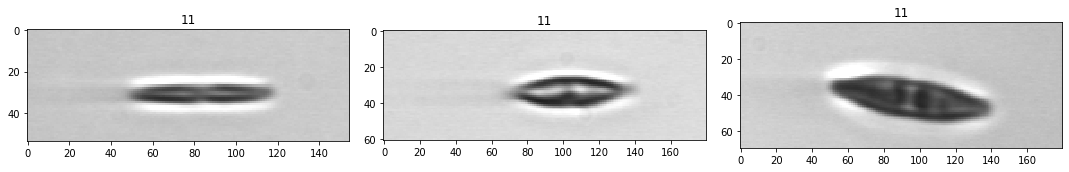

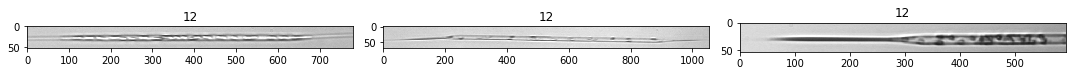

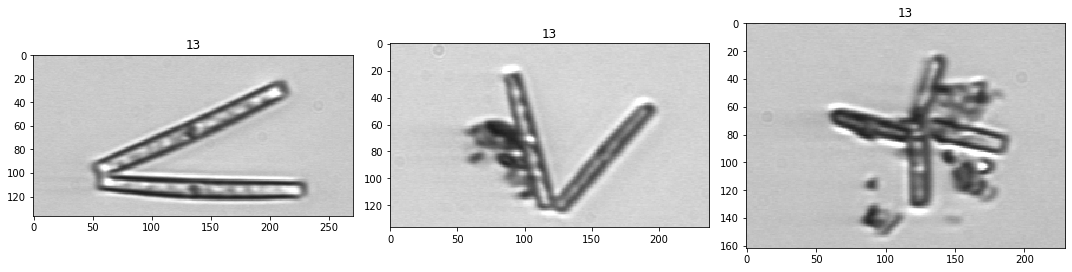

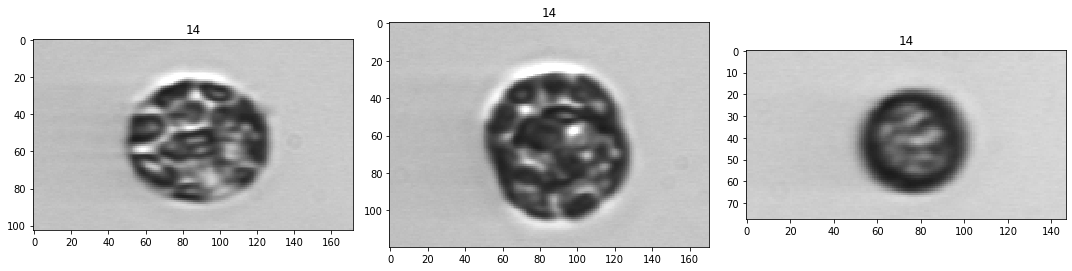

In [24]:
def display_samples(df, columns=3, rows=1):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for idx in range(columns*rows):
        i = random.choice(df.index.values)
        image_path = df.loc[i,'id']
        image_id = df.loc[i,'label']
        img = cv2.imread(f'../data/train_final/{image_path}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, idx+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

for i in range(1, 15):
    display_samples(train_df[train_df['label'] == i])

In [25]:
train_df.head()

,id,label
0,f1.png,10
1,f2.png,13
2,f3.png,7
3,f4.png,7
4,f5.png,7


In [87]:
df = train_df.query('label == 8')

(129, 305, 3)


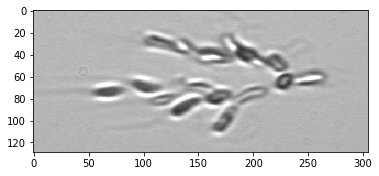

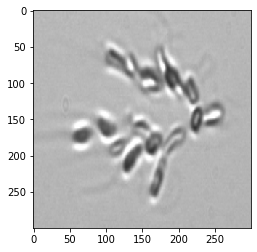

In [88]:
name = df.iloc[9]['id']
path = '../data/train_final/' + name
img = cv2.imread(path)
print(img.shape)
plt.imshow(img); plt.show()
resized = cv2.resize(img, (300, 300))
plt.imshow(resized)

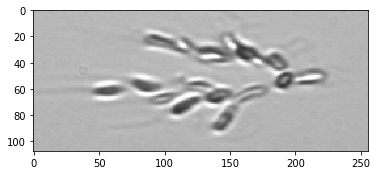

In [89]:
size = 256
h, w, _ = img.shape
if h <= w:
    nh, nw = int(size * (h/w) ), size
elif h > w:
    nh, nw = size, int(size * (w/h) )
nimg = cv2.resize(img, (nw, nh))
plt.imshow(nimg)

In [90]:
from albumentations import PadIfNeeded
aug = PadIfNeeded(size, size, p=1, border_mode=1)

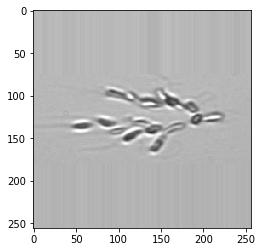

In [91]:
aug_img = aug(image=nimg)['image']
plt.imshow(aug_img)

In [36]:
cv2.resize?

In [2]:
test = pd.read_csv('../data/sample.csv')

In [3]:
test.shape

(15984, 2)

In [4]:
path = '/media/ags/DATA/CODE/vista/data/train_final/f10777.png'

In [5]:
img = cv2.imread(path)

In [7]:
img = Image.open(path)

FileNotFoundError: [Errno 2] No such file or directory: '/media/ags/DATA/CODE/vista/data/train_final/f10777.png'

In [6]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
import os
for fname in test['id']:
    path = '../data/test_final/'+ fname
    print(path)
    try:
        exists = os.path.isfile(path) 
        if not exists:
            print(path)
    except Exception as e:
        print(e)


../data/test_final/f1.png
../data/test_final/f2.png
../data/test_final/f3.png
../data/test_final/f4.png
../data/test_final/f5.png
../data/test_final/f6.png
../data/test_final/f7.png
../data/test_final/f8.png
../data/test_final/f9.png
../data/test_final/f10.png
../data/test_final/f11.png
../data/test_final/f12.png
../data/test_final/f13.png
../data/test_final/f14.png
../data/test_final/f15.png
../data/test_final/f16.png
../data/test_final/f17.png
../data/test_final/f18.png
../data/test_final/f19.png
../data/test_final/f20.png
../data/test_final/f21.png
../data/test_final/f22.png
../data/test_final/f23.png
../data/test_final/f24.png
../data/test_final/f25.png
../data/test_final/f26.png
../data/test_final/f27.png
../data/test_final/f28.png
../data/test_final/f29.png
../data/test_final/f30.png
../data/test_final/f31.png
../data/test_final/f32.png
../data/test_final/f33.png
../data/test_final/f34.png
../data/test_final/f35.png
../data/test_final/f36.png
../data/test_final/f37.png
../data/te

../data/test_final/f2854.png
../data/test_final/f2855.png
../data/test_final/f2856.png
../data/test_final/f2857.png
../data/test_final/f2858.png
../data/test_final/f2859.png
../data/test_final/f2860.png
../data/test_final/f2861.png
../data/test_final/f2862.png
../data/test_final/f2863.png
../data/test_final/f2864.png
../data/test_final/f2865.png
../data/test_final/f2866.png
../data/test_final/f2867.png
../data/test_final/f2868.png
../data/test_final/f2869.png
../data/test_final/f2870.png
../data/test_final/f2871.png
../data/test_final/f2872.png
../data/test_final/f2873.png
../data/test_final/f2874.png
../data/test_final/f2875.png
../data/test_final/f2876.png
../data/test_final/f2877.png
../data/test_final/f2878.png
../data/test_final/f2879.png
../data/test_final/f2880.png
../data/test_final/f2881.png
../data/test_final/f2882.png
../data/test_final/f2883.png
../data/test_final/f2884.png
../data/test_final/f2885.png
../data/test_final/f2886.png
../data/test_final/f2887.png
../data/test_f

../data/test_final/f6186.png
../data/test_final/f6187.png
../data/test_final/f6188.png
../data/test_final/f6189.png
../data/test_final/f6190.png
../data/test_final/f6191.png
../data/test_final/f6192.png
../data/test_final/f6193.png
../data/test_final/f6194.png
../data/test_final/f6195.png
../data/test_final/f6196.png
../data/test_final/f6197.png
../data/test_final/f6198.png
../data/test_final/f6199.png
../data/test_final/f6200.png
../data/test_final/f6201.png
../data/test_final/f6202.png
../data/test_final/f6203.png
../data/test_final/f6204.png
../data/test_final/f6205.png
../data/test_final/f6206.png
../data/test_final/f6207.png
../data/test_final/f6208.png
../data/test_final/f6209.png
../data/test_final/f6210.png
../data/test_final/f6211.png
../data/test_final/f6212.png
../data/test_final/f6213.png
../data/test_final/f6214.png
../data/test_final/f6215.png
../data/test_final/f6216.png
../data/test_final/f6217.png
../data/test_final/f6218.png
../data/test_final/f6219.png
../data/test_f

../data/test_final/f9551.png
../data/test_final/f9552.png
../data/test_final/f9553.png
../data/test_final/f9554.png
../data/test_final/f9555.png
../data/test_final/f9556.png
../data/test_final/f9557.png
../data/test_final/f9558.png
../data/test_final/f9559.png
../data/test_final/f9560.png
../data/test_final/f9561.png
../data/test_final/f9562.png
../data/test_final/f9563.png
../data/test_final/f9564.png
../data/test_final/f9565.png
../data/test_final/f9566.png
../data/test_final/f9567.png
../data/test_final/f9568.png
../data/test_final/f9569.png
../data/test_final/f9570.png
../data/test_final/f9571.png
../data/test_final/f9572.png
../data/test_final/f9573.png
../data/test_final/f9574.png
../data/test_final/f9575.png
../data/test_final/f9576.png
../data/test_final/f9577.png
../data/test_final/f9578.png
../data/test_final/f9579.png
../data/test_final/f9580.png
../data/test_final/f9581.png
../data/test_final/f9582.png
../data/test_final/f9583.png
../data/test_final/f9584.png
../data/test_f

../data/test_final/f12909.png
../data/test_final/f12910.png
../data/test_final/f12911.png
../data/test_final/f12912.png
../data/test_final/f12913.png
../data/test_final/f12914.png
../data/test_final/f12915.png
../data/test_final/f12916.png
../data/test_final/f12917.png
../data/test_final/f12918.png
../data/test_final/f12919.png
../data/test_final/f12920.png
../data/test_final/f12921.png
../data/test_final/f12922.png
../data/test_final/f12923.png
../data/test_final/f12924.png
../data/test_final/f12925.png
../data/test_final/f12926.png
../data/test_final/f12927.png
../data/test_final/f12928.png
../data/test_final/f12929.png
../data/test_final/f12930.png
../data/test_final/f12931.png
../data/test_final/f12932.png
../data/test_final/f12933.png
../data/test_final/f12934.png
../data/test_final/f12935.png
../data/test_final/f12936.png
../data/test_final/f12937.png
../data/test_final/f12938.png
../data/test_final/f12939.png
../data/test_final/f12940.png
../data/test_final/f12941.png
../data/te

In [12]:
arr = np.array([1, 2, 3])

In [14]:
np.argmax?